<a href="https://colab.research.google.com/github/sahaparamjit/fast-ai/blob/master/Fast_Ai_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = untar_data(URLs.PETS)

In [81]:
print(path.ls())
path_img = path/'images'
img = get_image_files(path_img)

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'), PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]


In [82]:
data = ImageDataBunch.from_name_re(path_img, img, r'([^/]+)_\d+.jpg$', ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Russian_Blue,Persian,leonberger,saint_bernard,scottish_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bombay,Abyssinian,leonberger,British_Shorthair,samoyed
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

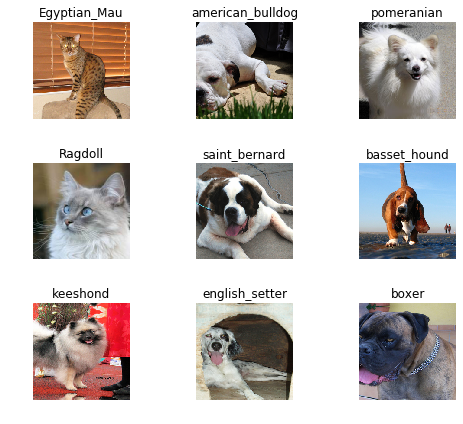

In [83]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [85]:
print(len(data.classes), data.c)
doc(cnn_learner)

37 37


In [86]:
doc(learn.fit_one_cycle)

In [87]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.395929,0.348430,0.899865,01:28
1,0.554402,0.247908,0.920162,01:29
2,0.342020,0.226768,0.933018,01:29
3,0.262557,0.212476,0.934371,01:30


In [88]:
doc(learn.predict)

In [89]:
learn.predict(learn.data.train_ds[0][0])

(Category Russian_Blue,
 tensor(9),
 tensor([2.8041e-04, 6.8420e-05, 7.8440e-06, 1.4005e-01, 2.9827e-02, 6.4459e-04,
         7.5715e-05, 2.5382e-05, 4.9205e-05, 8.2643e-01, 1.5892e-04, 1.5854e-04,
         3.8689e-05, 3.3176e-05, 3.7744e-05, 1.3615e-05, 3.6831e-05, 1.1658e-04,
         1.2535e-05, 1.5092e-05, 1.4934e-04, 2.1006e-05, 1.1987e-05, 1.8920e-05,
         1.9671e-04, 6.7047e-05, 1.4892e-04, 4.7981e-04, 5.1838e-05, 2.7056e-05,
         9.1708e-06, 3.0812e-04, 2.2557e-04, 4.0787e-05, 1.2378e-04, 1.6342e-05,
         2.2801e-05]))

In [0]:
inter = ClassificationInterpretation.from_learner(learn)

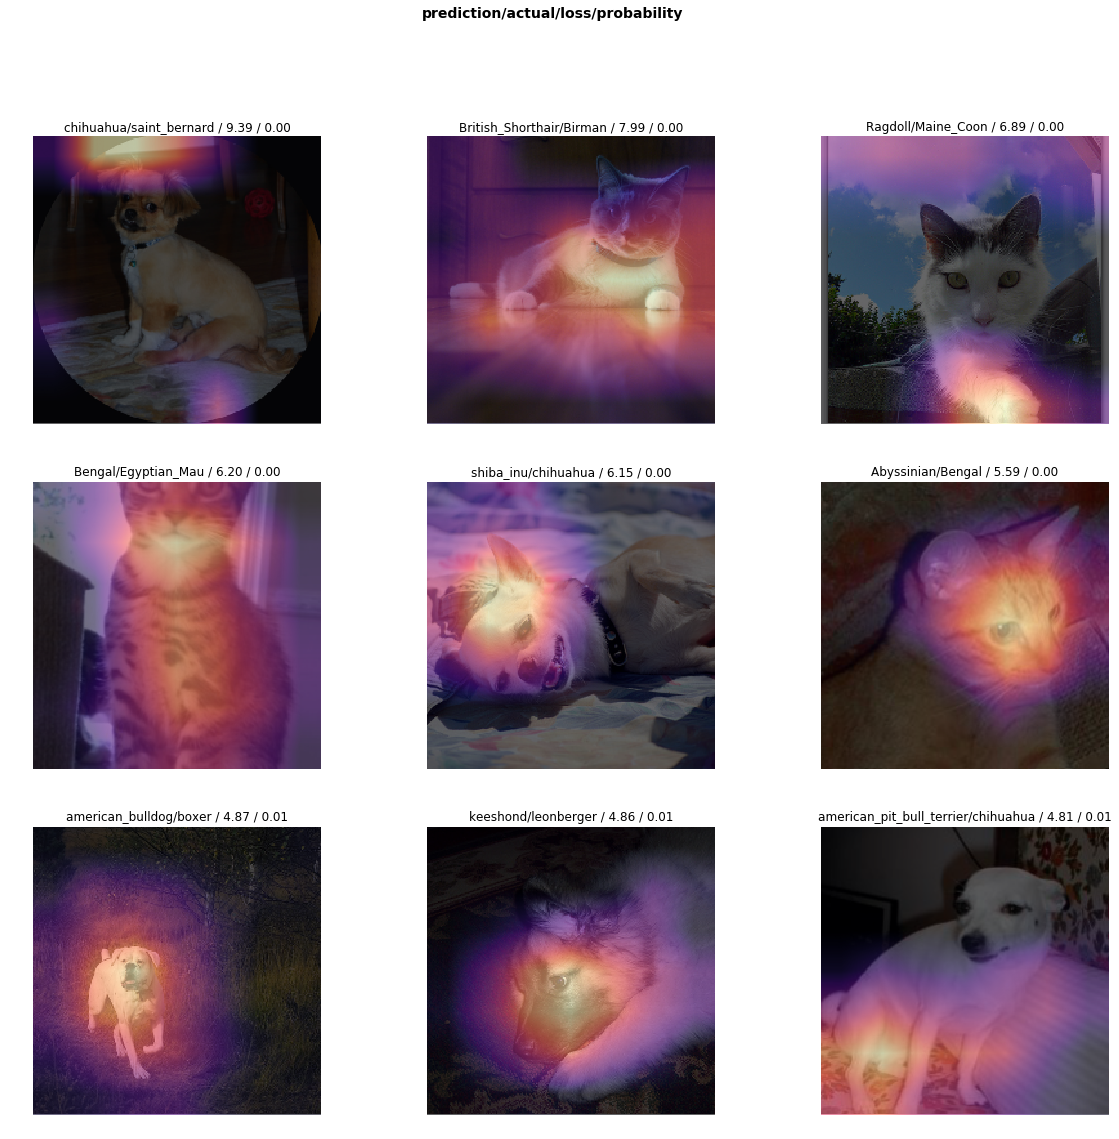

In [92]:
inter.plot_top_losses(9, figsize=(20,18))

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [97]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.512193,0.352361,0.891069,01:37


In [98]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


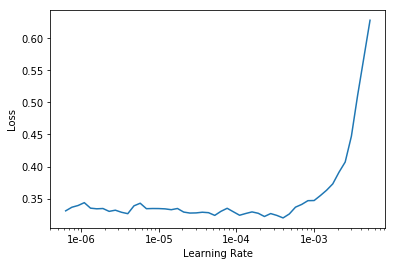

In [99]:
learn.recorder.plot()

In [103]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.187476,0.238151,0.921516,01:29
1,0.162867,0.233522,0.927605,01:30
2,0.134195,0.222413,0.927605,01:33
3,0.116167,0.217517,0.925575,01:32


In [0]:
learn.save('stage-1-unfreeze')

In [0]:
learn.load('stage-1-unfreeze')
inter2 = ClassificationInterpretation.from_learner(learn)

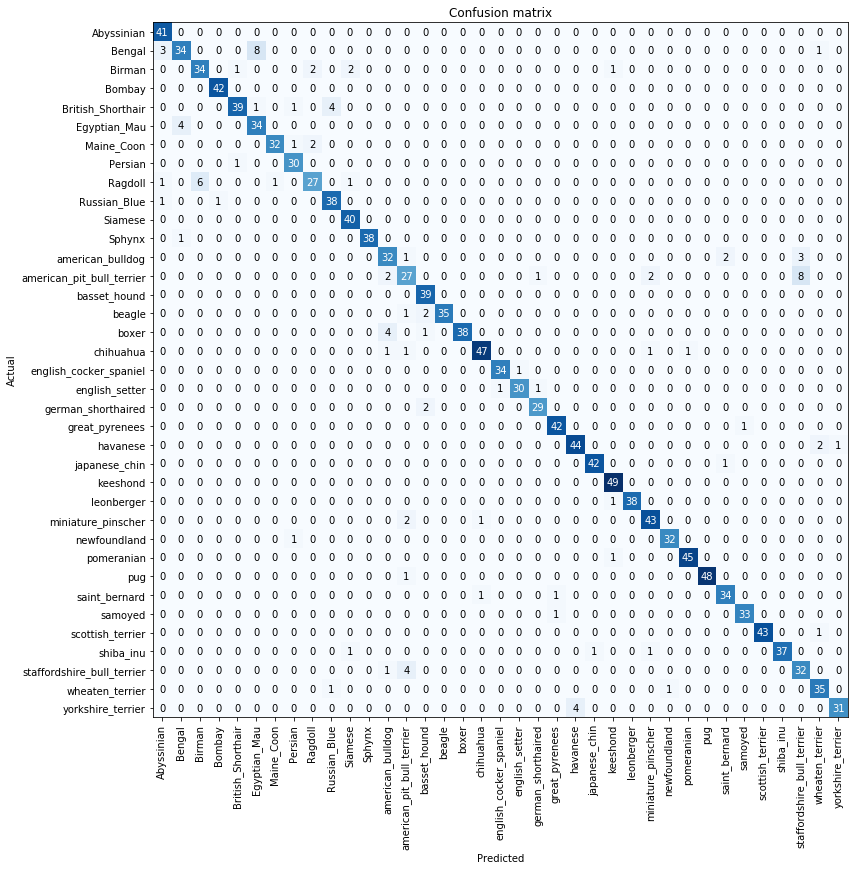

In [109]:
inter2.plot_confusion_matrix(figsize=(12,12))